# Parte 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
notas = pd.read_csv('ratings.csv')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape #(linhas, colunas)

(100836, 4)

In [5]:
# Renomeando colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts() #conta o numero de valores

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
print('Media dos valores: ',notas['nota'].mean())
print('Mediana dos valores: ',notas['nota'].median()) # Aonde divide os valores da metade de baixo e metade a cima

Media dos valores:  3.501556983616962
Mediana dos valores:  3.5


In [11]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

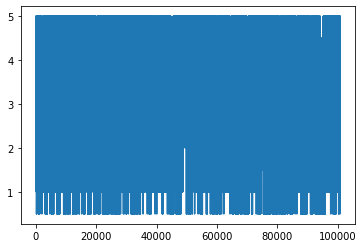

In [12]:
'''
Aqui ele pega cada indicie (0,1,2,..,100835) e coloca um ponto nas cordenadas
ficando uma confunsão para uma melhor visualização utiliza-se o histograma,
assim, conseguimos ver uma história melhor de cada pontuação.
'''
notas.nota.plot()

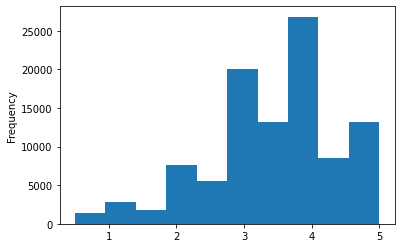

In [13]:
notas.nota.plot(kind='hist')

In [14]:
'''
Aqui conseguimos ver que:
    - Há 100836 linhas neste dataframe
    - A media é de 3.501; mean
    - O minimo é de nota é 0.5 e o máximo é de 5; min/max
    - 1/4 dos valores estão abaixo da nota 3; 25%
    - 3.5 é a nota que divide metade para baixo e metade para cima 50%
    - 1/4 dos valores estão acima da nota 4. 75%
'''
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


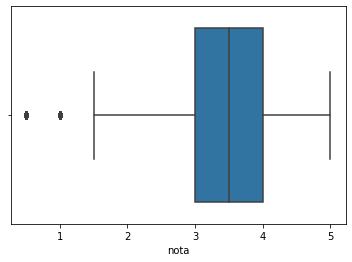

In [16]:
'''
No boxplot podemos observar que a nota que divide a parte superior e inferior das notas, ou seja,
a media é de 3.5.

Vemos que 25% das notas estão acima de 4 e outros 25% estão a baixo de 3.

Neste boxplot também podemos ver que 50% das notas se concentram entre as notas 3 e 4.

E por fim podemos ver que as notas 1 e 0.5 não são muito frequentes, tendo o minimo das notas
como 1.5 e o maximo como 5.
'''
sns.boxplot(notas.nota)


# Parte 2

In [17]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
filmes.query('filmeId == 1')

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [19]:
notas.query('filmeId == 1').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [20]:
media_notas_por_filmes = notas.groupby('filmeId').mean().nota

In [21]:
media_notas_por_filmes[:4]

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
Name: nota, dtype: float64

### Usando o matplotlib

> As librarys Pandas e Seaborn utilizam por debaixo dos panos a framework
**matplotlib.pyplot** sua abriviação é plt, assim, se mudarmos por exemplo o titulo do grafico plotado com o plt.title(), irá também modificar o titulo do plot feito na biblioteca Pandas ou Seaborn.

> **OBS: As alterações são validas apenas para os blocos de codigo executados juntos.**

Text(0.5, 1.0, 'histograma das medias dos filmes')

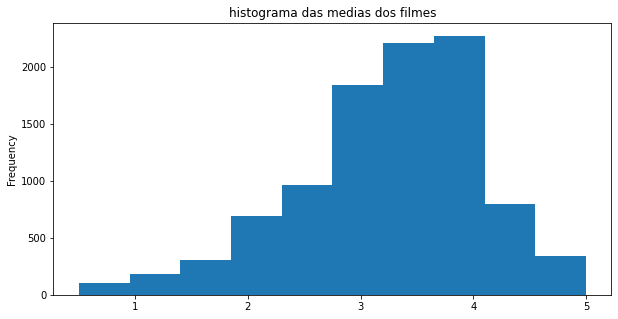

In [22]:
plt.figure(figsize=(10,5)) #Muda o tamanho da imagem visualizada, **precisa ser chamada antes de plotar a imagem**
media_notas_por_filmes.plot(kind='hist')
plt.title("histograma das medias dos filmes")

Text(0.5, 1.0, 'boxplot das medias dos filmes')

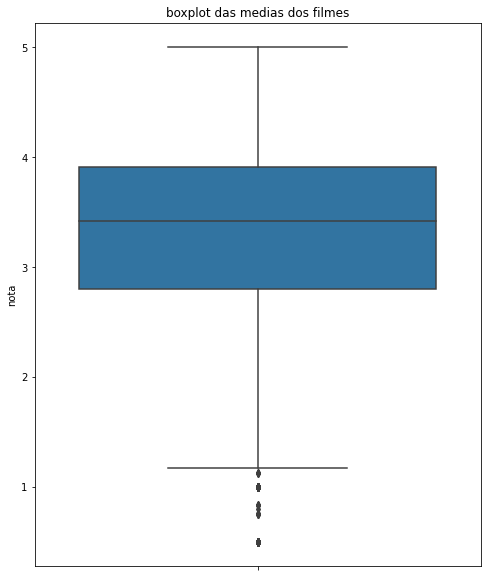

In [23]:
plt.figure(figsize=(8,10))
sns.boxplot(y=media_notas_por_filmes)
plt.title("boxplot das medias dos filmes")


In [24]:
media_notas_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

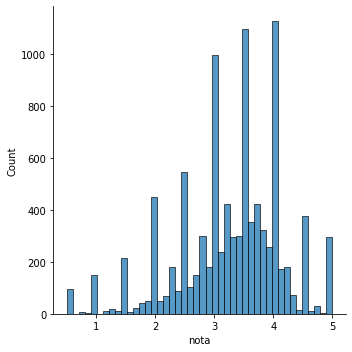

In [25]:
sns.displot(media_notas_por_filmes)

Text(0.5, 1.0, 'histograma das medias dos filmes')

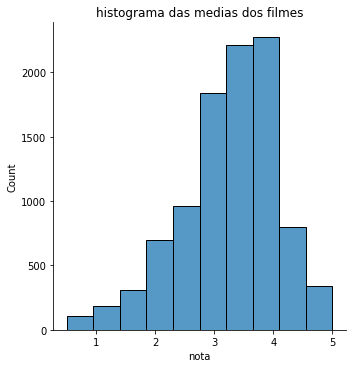

In [26]:
sns.displot(media_notas_por_filmes, bins=10)
plt.title("histograma das medias dos filmes")

Text(0.5, 1.0, 'histograma das medias dos filmes')

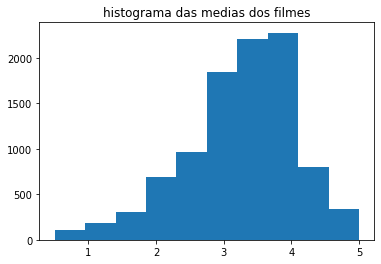

In [27]:
plt.hist(media_notas_por_filmes)
plt.title("histograma das medias dos filmes")

# Parte 3

In [28]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [29]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [30]:
tmdb['original_language'].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [106]:
frequencia_liguaguem_filme = tmdb['original_language'].value_counts()
frequencia_liguaguem_filme

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ar       2
id       2
ro       2
ta       2
cs       2
tr       1
ky       1
pl       1
is       1
ps       1
xx       1
af       1
no       1
el       1
te       1
hu       1
nb       1
vi       1
sl       1
Name: original_language, dtype: int64

In [107]:
frequencia_liguaguem_filme = frequencia_liguaguem_filme.to_frame().reset_index()
frequencia_liguaguem_filme

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [33]:
frequencia_liguaguem_filme.columns =['original_language', 'total']

In [34]:
frequencia_liguaguem_filme.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Text(0.5, 1.0, 'Grafico de barras das frenquencias de lingua nos filmes')

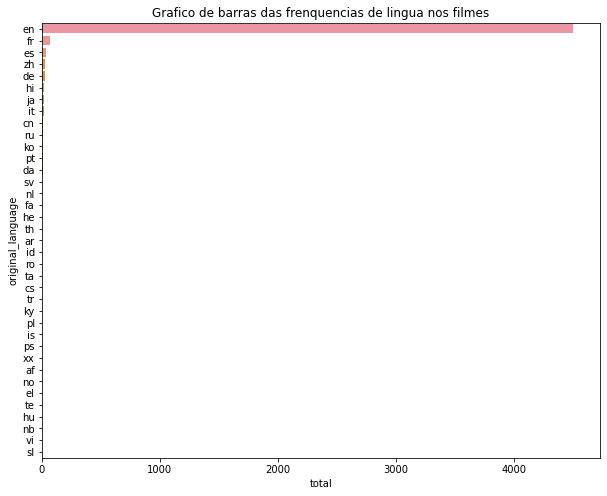

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'total', y = 'original_language', data = frequencia_liguaguem_filme)
plt.title('Grafico de barras das frenquencias de lingua nos filmes')

Text(0.5, 1.0, 'Frequecia lingua filmes')

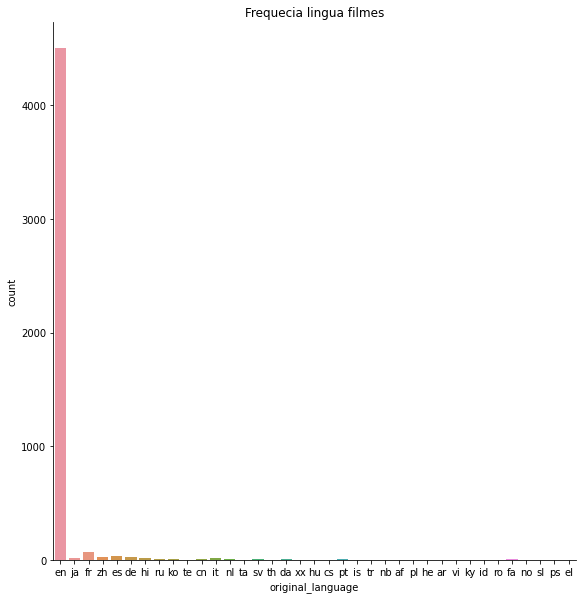

In [36]:
# plt.figure(figsize=(10,8))
sns.catplot(x = 'original_language', kind = 'count', data = tmdb, height=8, aspect=1)
plt.title("Frequecia lingua filmes")

In [37]:
total_linguas = tmdb['original_language'].value_counts()

In [38]:
total_linguas.head()

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

In [39]:
total_ingles = total_linguas.loc['en']
total_ingles

4505

In [40]:
total_geral = total_linguas.sum()
total_geral

4803

In [41]:
total_outros = total_geral - total_ingles
total_outros

298

In [42]:
dicionario ={
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_outros]
}

In [43]:
dicionario

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [44]:
dados_linguas = pd.DataFrame(dicionario)
dados_linguas

,lingua,total
0,ingles,4505
1,outros,298


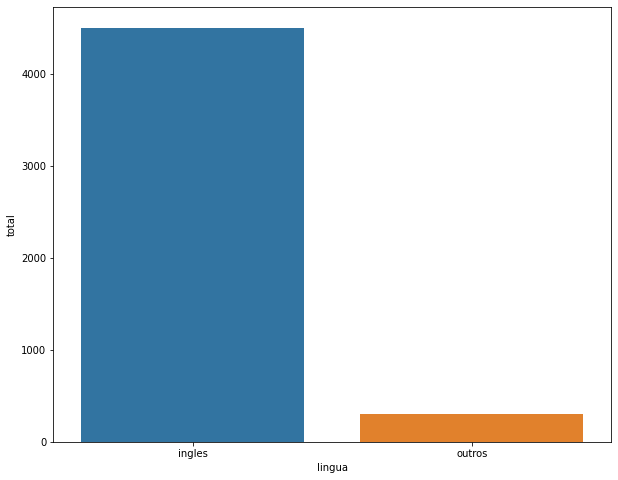

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'lingua', y = 'total', data = dados_linguas)

([<matplotlib.patches.Wedge at 0x7f55ecf04cd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

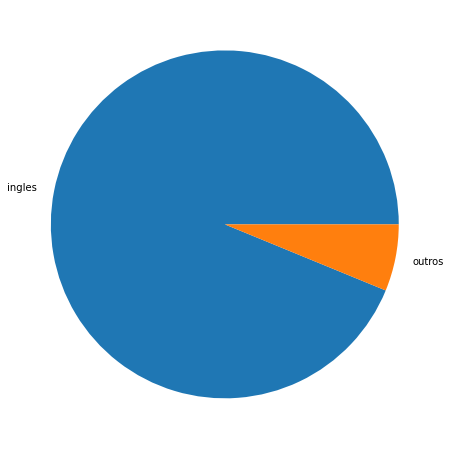

In [46]:
plt.figure(figsize=(10,8))
plt.pie(x = 'total', labels='lingua', data = dados_linguas)

In [103]:
lingua_original_dos_filmes_sem_ingles = tmdb.query('original_language != "en"')
lingua_original_dos_filmes_sem_ingles.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471


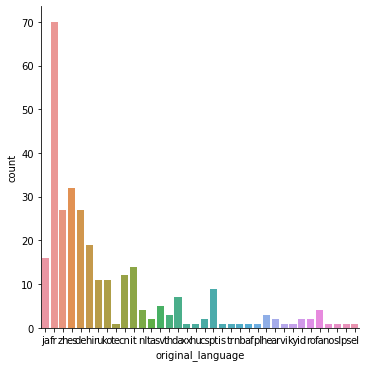

In [48]:
sns.catplot(x = 'original_language', kind='count', data = lingua_original_dos_filmes_sem_ingles)

In [49]:
lingua_original_dos_filmes_sem_ingles['original_language'].value_counts

<bound method IndexOpsMixin.value_counts of 97      ja
235     fr
317     zh
474     fr
492     es
        ..
4739    fr
4751    pt
4790    fa
4792    ja
4798    es
Name: original_language, Length: 298, dtype: object>

In [50]:
ordena_valores_totais = tmdb.query('original_language != "en"')['original_language'].value_counts()
print('indices: ', ordena_valores_totais.index)
print('valores: ', ordena_valores_totais.values)

indices:  Index(['fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da',
       'sv', 'nl', 'fa', 'he', 'th', 'id', 'ar', 'ta', 'cs', 'ro', 'nb', 'af',
       'sl', 'pl', 'xx', 'ps', 'el', 'is', 'hu', 'vi', 'no', 'ky', 'tr', 'te'],
      dtype='object')
valores:  [70 32 27 27 19 16 14 12 11 11  9  7  5  4  4  3  3  2  2  2  2  2  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]


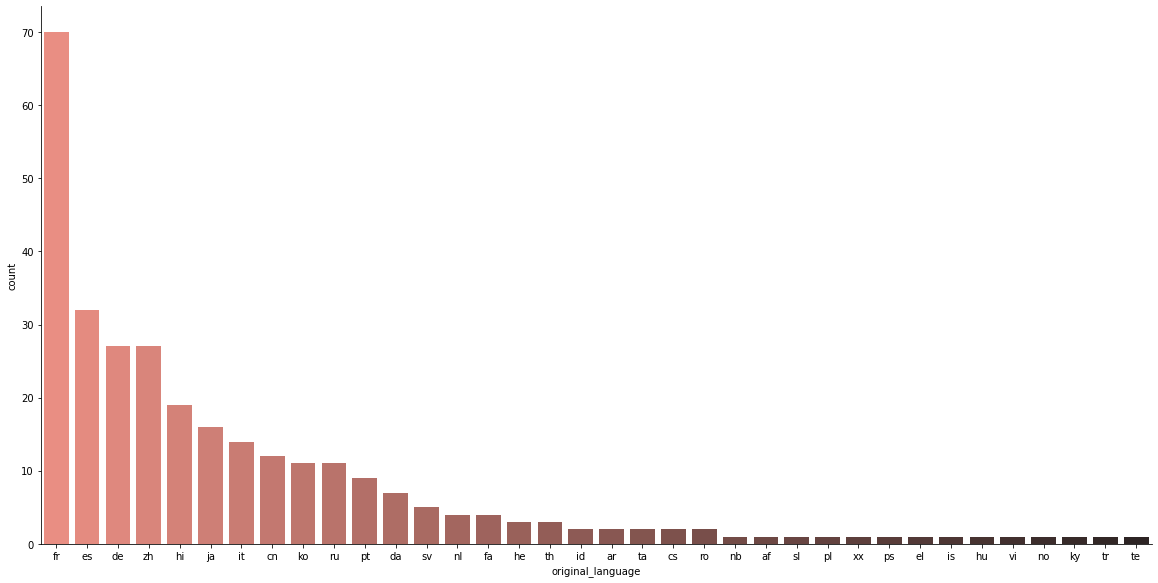

In [51]:
sns.catplot(x = 'original_language'
            , kind='count'
            , data = lingua_original_dos_filmes_sem_ingles
            , order = ordena_valores_totais.index
            , height = 8
            , aspect = 2
            , palette = 'dark:salmon_r')

# Parte 4

In [55]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [54]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')

In [78]:
print('media do filme toy story: ', round(notas_toy_story['nota'].mean(),ndigits=2))
print('media do filme jumanji: ', round(notas_jumanji['nota'].mean(), ndigits=2))

media do filme toy story:  3.92
media do filme jumanji:  3.43


In [101]:
print('Desvio padrao toy story: ', notas_toy_story['nota'].std())
print('Desvio padrao jumanji: ', notas_jumanji['nota'].std())

Desvio padrao toy story:  0.8348591407114045
Desvio padrao jumanji:  0.8817134921476455


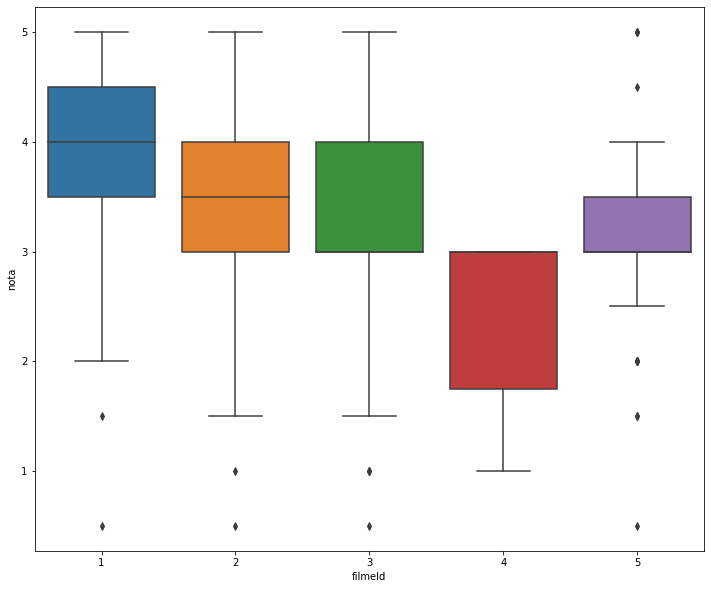

In [98]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1, 2, 3, 4, 5]'))

## Exemplo de distribuição


In [79]:
import numpy as np

In [87]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [102]:
print('media filme 1: ', np.mean(filme1))
print('media filme 2: ', np.mean(filme2))
print('mediana filme 1: ', np.median(filme1))
print('mediana filme 2: ', np.median(filme2))
print('desvio padrao filme 1: ', np.std(filme1))
print('desvio padrao filme 2: ', np.std(filme2))

media filme 1:  3.0
media filme 2:  3.0
mediana filme 1:  3.0
mediana filme 2:  3.0
desvio padrao filme 1:  0.5
desvio padrao filme 2:  2.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

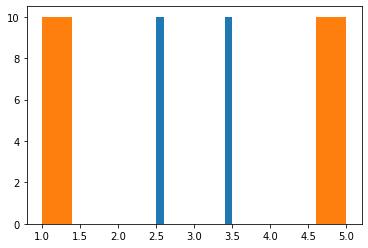

In [89]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f55e7adf590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55e7ae5590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f55e7aed5d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f55e7aed090>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f55e7adfad0>,
  <matplotlib.lines.Line2D at 0x7f55e7af45d0>]}

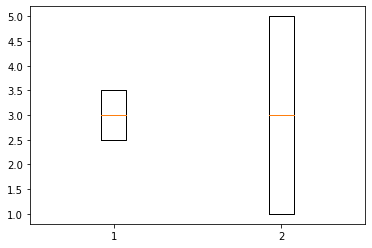

In [94]:
plt.boxplot([filme1, filme2])